<center ><h1> Project prediction machine learning </h1>

In [650]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")



### 1.สนใจข้อมูลชุดนี้เพราะสามารถนำไปใช้ได้จริงในการซื้อขายบ้านหรือคอนโด เพราะในอนาคตการตัดสินใจซื้อบ้านในราคาที่เหมาะสมต้องมีปัจจัยต่างๆที่เหมาะสมด้วย 


# Read data

In [651]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# 2.insight
### ใช้ฟังชั่น describe ดู mean , std , min , max [ dataset ไม่สามารถตัด coloums ได้ เพราะทุก coloums จำเป็นต่อการ prediction]

In [652]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# 3.Data Visualization

<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='price', ylabel='Density'>

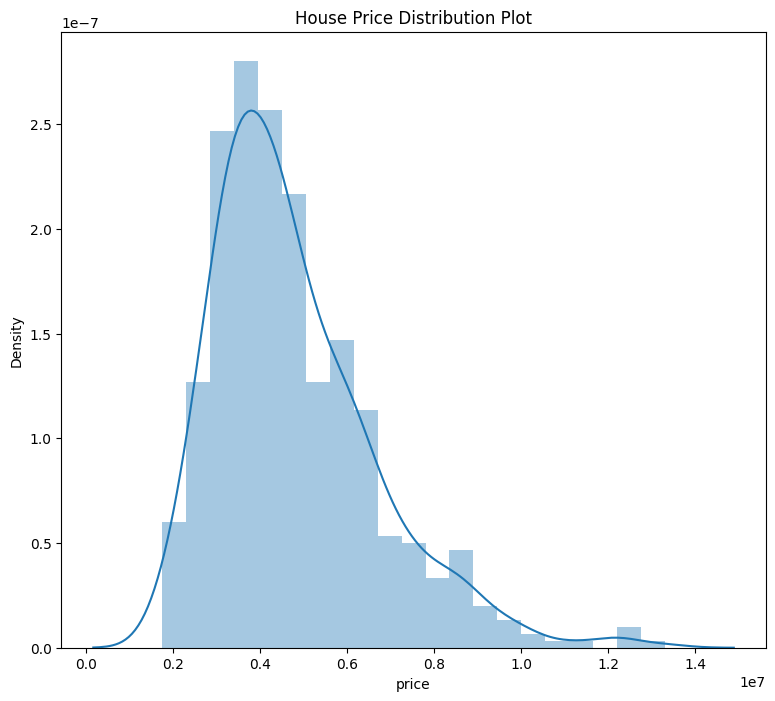

In [653]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)


In [654]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


# Data preprocessing

#### Dummy variable

##### เปลี่ยน yes no เป็น 1 กับ 0 

In [655]:
lb = LabelEncoder()
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in cat_data:
    df[i] = lb.fit_transform(df[i]) 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [656]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# กำหนด ค่า x และ y

In [657]:
x = df.drop('price',axis=1)
y = df.price

In [658]:
print(x)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [659]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


### แยกตัวแปรด้วยฟังชั่น train_test_split 

In [660]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state = 100)
print("Training set shape " , X_train.shape , y_train.shape)
print("Testing set shape " , X_test.shape ,y_test.shape)

Training set shape  (354, 12) (354,)
Testing set shape  (191, 12) (191,)


In [661]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
528,3970,1,1,1,0,0,0,0,0,0,0,2
75,4260,4,2,2,1,0,0,1,0,0,0,1
241,3760,3,1,1,1,0,0,0,0,2,0,1
219,7000,3,1,2,1,0,1,0,0,0,0,2
84,3760,3,1,2,1,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,3180,2,1,1,1,0,0,0,0,0,0,2
53,5150,3,2,4,1,0,0,0,1,2,0,1
350,3420,2,1,2,1,0,0,1,0,1,0,1
79,6000,3,2,3,1,1,0,0,1,0,0,0


In [662]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,2880,3,1,2,1,0,0,0,0,0,1,1
54,6000,3,2,2,1,1,0,0,1,1,0,1
171,10269,3,1,1,1,0,0,0,0,1,1,1
244,5320,3,1,2,1,1,1,0,0,0,1,1
268,4950,4,1,2,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
476,5850,3,1,2,1,0,1,0,0,1,0,2
124,6525,3,2,4,1,0,0,0,0,1,0,0
225,6440,2,1,1,1,0,0,0,1,3,0,1
363,3584,2,1,1,1,0,0,1,0,0,0,1


In [663]:
y_train

528    2275000
75     6650000
241    4550000
219    4795000
84     6510000
        ...   
526    2310000
53     7350000
350    3780000
79     6650000
520    2450000
Name: price, Length: 354, dtype: int64

In [664]:
y_test

265    4403000
54     7350000
171    5250000
244    4550000
268    4382000
        ...   
476    2940000
124    5950000
225    4753000
363    3710000
227    4690000
Name: price, Length: 191, dtype: int64

# 4.Multipul Linear Regression

#### - วัตถุประสงค์คือต้องการทำนายราคาบ้านเพราะว่า จะได้รู้ว่าในตลาดมีเจ้าที่ไหน ที่ขายคอนโดหรือบ้านเกินราคาบ้าง เพื่อประกอบต่อการตัดสินใจ ไม่ว่าเราจะเป็นผู้ซื้อหรือผู้ขายการ preduction dataset นี้จำเป็นมากๆ 

#### - เลือกใช้ Multipul Linear Regression เพราะ ค่า x ของเรานั้นมีหลายค่่า และ ค่า y เป็นตัวเลขที่มีแนวโน้มมากขึ้น - ลดลง เป็น linear




In [665]:
slr = LinearRegression()
slr.fit(X_train,y_train)


LinearRegression()

# 5

# Train

In [666]:
y_pred_slr_Train = slr.predict(X_train)
print("prediction for test set:{}".format(y_pred_slr_Train))

prediction for test set:[2163529.41822342 5779081.59318942 3667237.83366755 4408966.02306788
 5076911.83564001 3625934.09426925 2543361.99522778 5285477.83604549
 3509927.75841964 2923414.5490604  4174747.97262252 4014952.56477081
 3596331.82806714 7132588.03496692 2375305.44355524 8308198.38714134
 3146828.58481725 4745167.68562444 4614985.42709516 4329461.2879596
 6220293.84717614 7645081.32384814 4600703.41040981 3859800.901426
 3647828.75878597 2777309.94313712 3029705.96379676 6097760.38610476
 5011563.62181833 2867556.83121741 5097319.2473739  4926076.46151965
 5753642.44765324 6363177.66515121 2808509.30795826 6300692.10600381
 5048743.45194734 4104163.4153604  5490314.95601518 2615373.77920454
 4097112.37923247 3824891.66176055 4645324.75048363 3813914.68929098
 5635345.85111556 4696540.17879951 3089423.18487363 6428389.41058899
 2972346.14087758 3699456.38937996 4082203.23660402 4373491.87621328
 2630186.14632257 5175611.88550109 4646393.50523661 3099706.64143622
 5448805.6677

## นำค่า y_train และ y_predict_train มา เทียบกันให้เห็นชัดๆ 

In [667]:
slr_diff_train = pd.DataFrame({'ค่าจริง (10 ^ 4)': (y_train)/10000, 'ค่าทำนาย (10 ^ 4)': (y_pred_slr_Train)/10000})
slr_diff_train

,ค่าจริง (10 ^ 4),ค่าทำนาย (10 ^ 4)
528,227.5,216.352942
75,665.0,577.908159
241,455.0,366.723783
219,479.5,440.896602
84,651.0,507.691184
...,...,...
526,231.0,266.755021
53,735.0,707.794772
350,378.0,460.763158
79,665.0,678.715001


 ## MAPE_Train

In [668]:
MAPE_error_Train = mean_absolute_percentage_error(y_train,y_pred_slr_Train)
MAPE_error_Train

0.1668708200519271

 ## Graph Train

Text(0.5, 1.0, 'Predicted vs Actual [Train]')

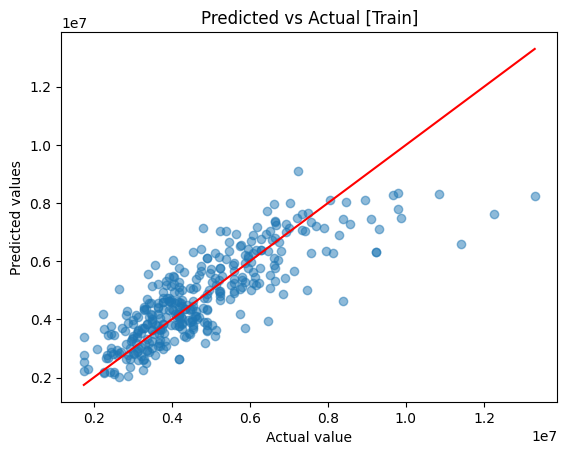

In [669]:
plt.scatter(y_train , y_pred_slr_Train , alpha=0.5)
plt.plot([y.min() , y.max()] , [y.min() , y.max()] , color = 'red')
plt.xlabel('Actual value')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual [Train]')

# TEST


In [670]:
y_pred_slr_Test = slr.predict(X_test)
print("prediction for test set:{}".format(y_pred_slr_Test))

prediction for test set:[ 4103119.14486258  6408762.94604111  5729340.34417219  5229658.61389718
  4713462.71221898  4008801.39687929  8120476.5987808   5523815.49263222
  3550506.25452771  5823064.73360627  2890048.82504083  6350797.72189571
  4658029.80541575  7287756.06751935  5715043.38265767  6640276.98094659
  8340041.63329783  4275467.47251131  6180535.4806679   4895032.47654472
  4284514.1255582   2793037.26105792  4632384.22466648  3557731.36085784
  2755116.29831607  3401387.58221497  5145172.75508962  6571807.62994444
  6526601.11278012  5023275.03919094  3027638.20752886  4423450.90638389
  3050489.71246124  2781944.24279529  4967358.13773216  4663519.24203319
  4591836.5400918   3379342.7817891   3429310.41109699  4154286.32770789
  2909234.58627945  5713670.30524777  5931455.96776052  3039684.24279295
  2691699.56615155  4600938.28091758  4528424.63388331  5139467.13408181
  3191865.59837018  6213515.16029815  2021819.62432307  6495105.37132001
  5897343.16725075  6526772

## นำค่า y_test และ y_predict_test มา เทียบกันให้เห็นชัดๆ 

In [671]:
slr_diff_test = pd.DataFrame({'ค่าจริง (10 ^ 4)': (y_test)/10000, 'ค่าทำนาย (10 ^ 4)': (y_pred_slr_Test)/10000})
slr_diff_test

,ค่าจริง (10 ^ 4),ค่าทำนาย (10 ^ 4)
265,440.3,410.311914
54,735.0,640.876295
171,525.0,572.934034
244,455.0,522.965861
268,438.2,471.346271
...,...,...
476,294.0,439.798427
124,595.0,661.354503
225,475.3,520.621580
363,371.0,393.256869


## MAPE_Test

In [672]:
MAPE_error_Test = mean_absolute_percentage_error(y_test,y_pred_slr_Test)
MAPE_error_Test

0.189631788755688

 ## Graph Test

Text(0.5, 1.0, 'Predicted vs Actual [Test]')

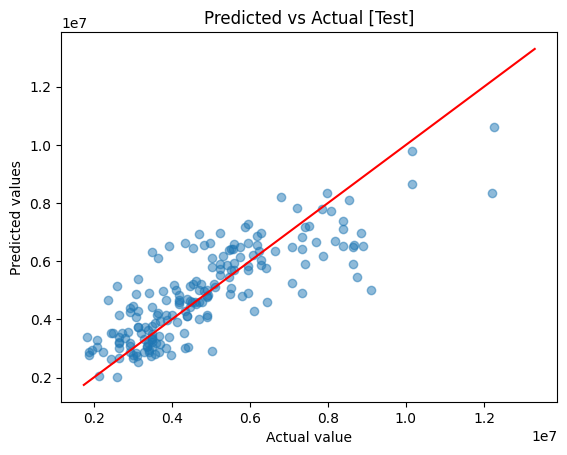

In [673]:
plt.scatter(y_test , y_pred_slr_Test , alpha=0.5)
plt.plot([y.min() , y.max()] , [y.min() , y.max()] , color = 'red')
plt.xlabel('Actual value')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual [Test]')